In [ ]:
""" Build a model to detect fraudulent credit card transactions. Use a
dataset containing information about credit card transactions, and
experiment with algorithms like Logistic Regression, Decision Trees,
or Random Forests to classify transactions as fraudulent or legitimate."""

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings("ignore")

In [7]:
train = pd.read_csv(r"C:\Users\ASUS\Naresh_IT\DATA SCIENCE\Data files\ML Codeway datasets\Task-2 fraudTrain.csv")
test = pd.read_csv(r"C:\Users\ASUS\Naresh_IT\DATA SCIENCE\Data files\ML Codeway datasets\Task-2 fraudTest.csv")

data = pd.concat([train,test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
print(train.shape)
print(test.shape)

(1296675, 23)
(555719, 23)


In [9]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.

In [11]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
555714      555714   2020-12-31 23:59:07    30560609640617   
555715      555715   2020-12-31 23:59:09  3556613125071656   
555716      555716   2020-12-31 23:59:15  6011724471098086   
555717      555717   2020-12-31 23:59:24     4079773899158   
555718      555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care 

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols =['merchant', 'category', 'gender', 'state','job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col]= le
    
    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le
    
    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

In [15]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob']=pd.to_datetime(data['dob'])

data['transaction_year']= data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transcation_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time','dob'], axis=1, inplace=True)

train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

train['transaction_year'] = train['trans_date_trans_time'].dt.year
train['transaction_month'] = train['trans_date_trans_time'].dt.month
train['transaction_day'] = train['trans_date_trans_time'].dt.day
train['transaction_hour'] = train['trans_date_trans_time'].dt.hour

train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] =train['dob'].dt.day
train.drop(['trans_date_trans_time','dob'], axis =1, inplace= True)


test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])

test['transaction_year'] = test['trans_date_trans_time'].dt.year
test['transaction_month'] = test['trans_date_trans_time'].dt.month
test['transaction_day'] = test['trans_date_trans_time'].dt.day
test['transaction_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day

test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [16]:
data.drop(['first','last','street','city','trans_num'], axis=1, inplace=True)
train.drop({'first','last','street','city','trans_num'}, axis=1, inplace=True)
test.drop({'first','last','street','city','trans_num'}, axis=1, inplace=True)

In [17]:
print(data.shape)
print(train.shape)
print(test.shape)

(1852394, 23)
(1296675, 23)
(555719, 23)


In [19]:
print(data.head())
print(data.describe())
print(data.isnull().sum())

   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       514         8    4.97       0     27   
1           1      630423337322       241         4  107.23       0     47   
2           2    38859492057661       390         0  220.11       1     13   
3           3  3534093764340240       360         2   45.00       1     26   
4           4   375534208663984       297         9   41.96       1     45   

     zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654  36.0788  -81.1781  ...  36.011293  -82.048315         0   
1  99160  48.8878 -118.2105  ...  49.159047 -118.186462         0   
2  83252  42.1808 -112.2620  ...  43.150704 -112.154481         0   
3  59632  46.2306 -112.1138  ...  47.034331 -112.561071         0   
4  24433  38.4207  -79.4629  ...  38.674999  -78.632459         0   

   transaction_year  transaction_month  transcation_day  transaction_hour  \
0              2019                  1 

<function matplotlib.pyplot.show(close=None, block=None)>

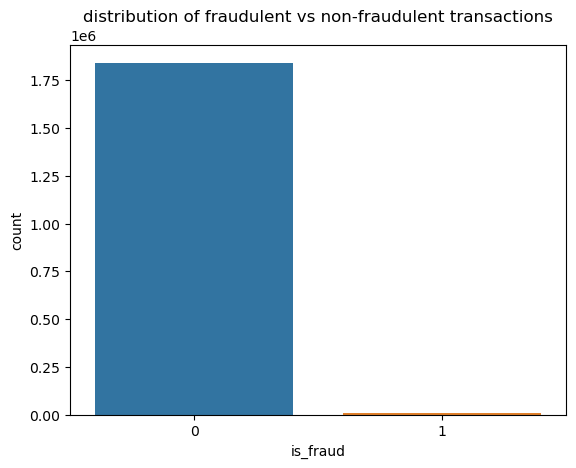

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = data, x ='is_fraud')
plt.title('distribution of fraudulent vs non-fraudulent transactions')
plt.show

In [23]:
print(data.index.duplicated().sum())
data = data.reset_index(drop = True)
print(data.index.duplicated().sum())

555719
0


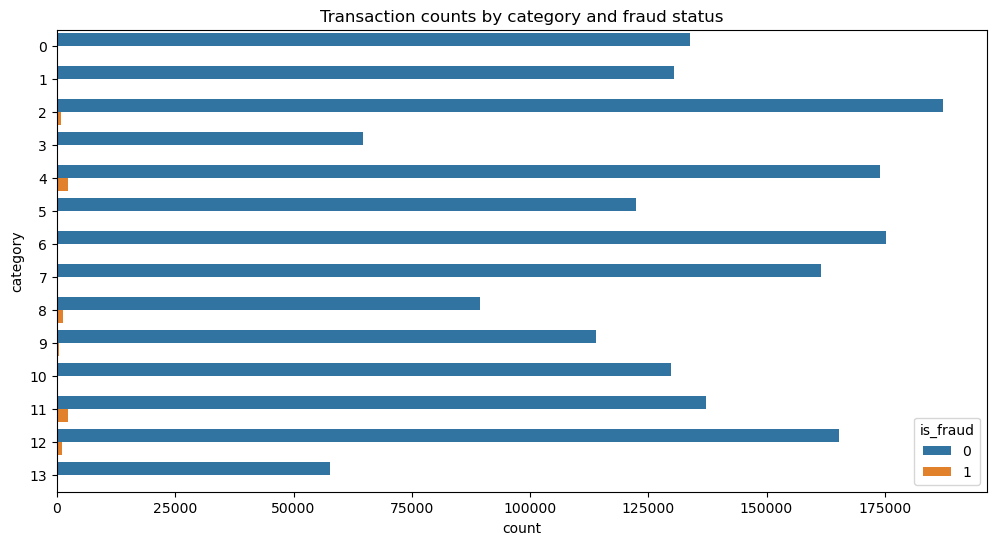

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data = data, y='category',hue ='is_fraud')
plt.title('Transaction counts by category and fraud status')
plt.xticks(rotation =0 )
plt.show()

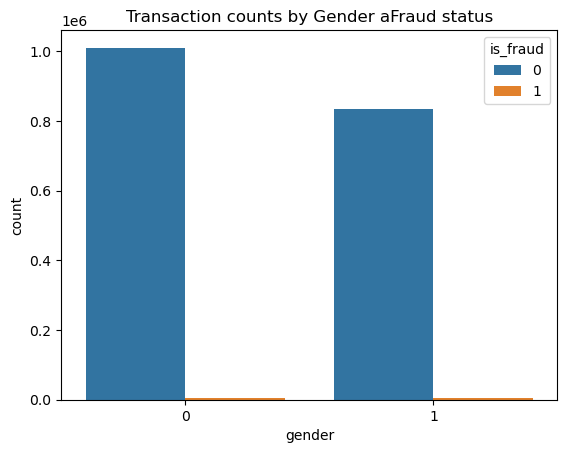

In [25]:
#here 0 represents male and 1 represents female
sns.countplot(data =data, x='gender', hue= 'is_fraud')
plt.title('Transaction counts by Gender aFraud status')
plt.show()

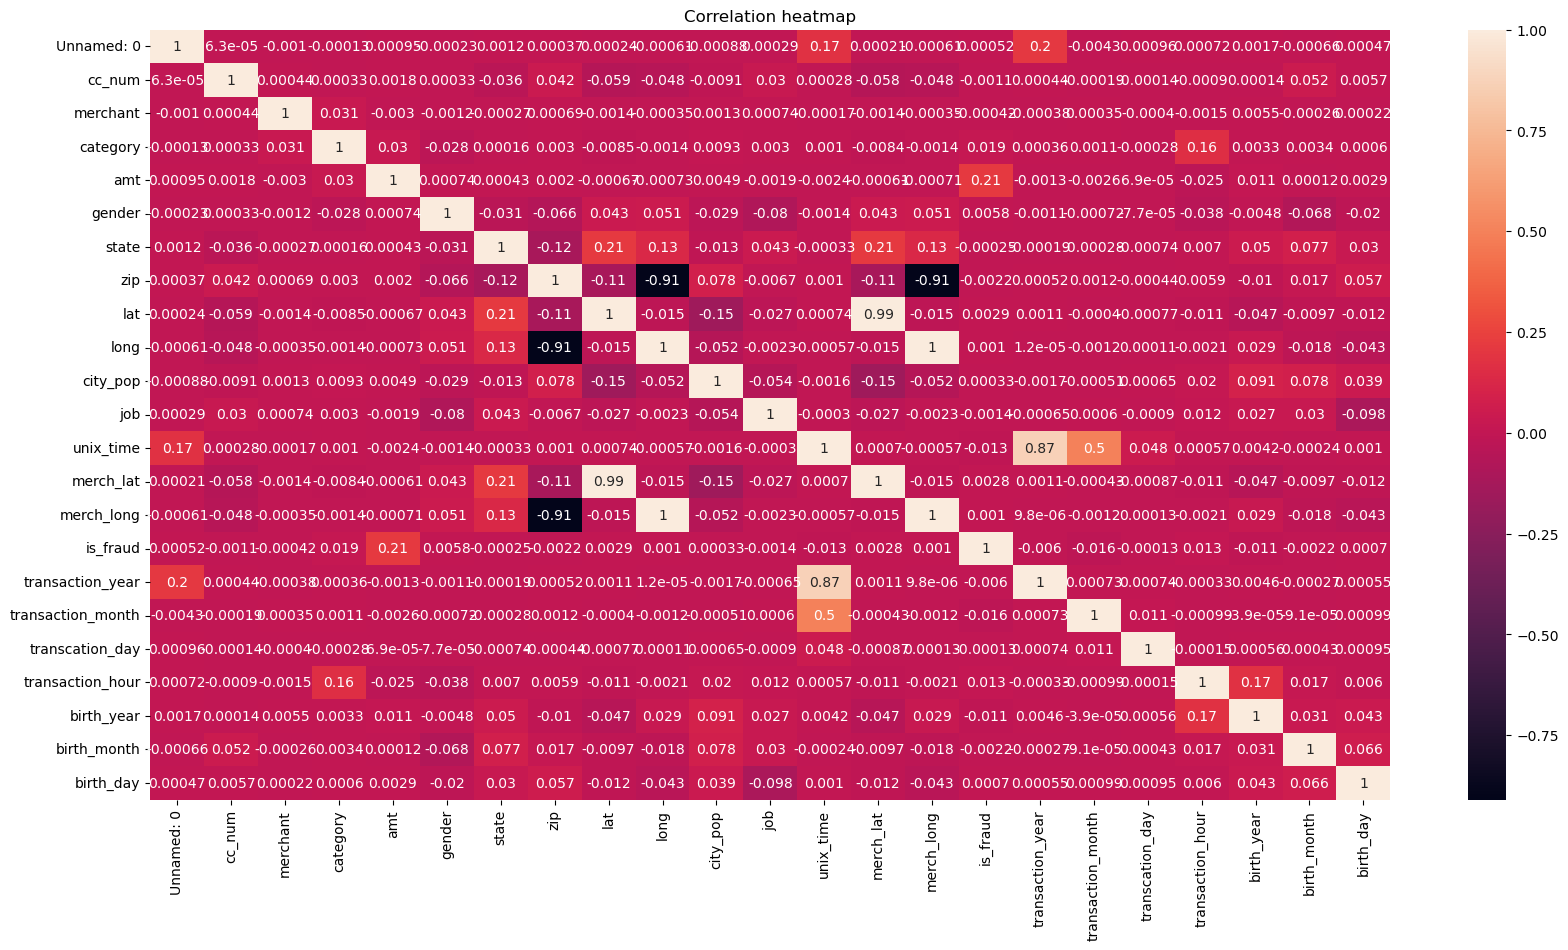

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot= True)
plt.title('Correlation heatmap')
plt.show()

In [27]:
X = data.drop('is_fraud',axis=1)
y= data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =42)

In [28]:
# Training the model for logistic regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred= log_model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy_score: ",accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    368526
           1       0.00      0.00      0.00      1953

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479

[[368526      0]
 [  1953      0]]
Accuracy_score:  0.9947284461467452


In [29]:
# Training the model with DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368526
           1       0.80      0.84      0.82      1953

    accuracy                           1.00    370479
   macro avg       0.90      0.92      0.91    370479
weighted avg       1.00      1.00      1.00    370479

[[368106    420]
 [   316   1637]]
Accuracy: 0.9980133826748615
